### Your tasks


1. Data cleaning and preparation. Be careful with those missing data and outliers.
2. Use the feature engineering techniques to create 10 new features and give your rationals. It can be common sense, or statistics or by any techniques in last class.
3. Use your new features to predict the home price. You will use RandomForestRegressor as shown in the class.
4. Try different new features to improve the model performance. Choose the appropriate performance matrics. Show your improvement.
5. Use Shapley summary plot to explain your model.
6. Submit all in a Jupyter file and HTML format on canvas

### Current Working Notebook ML Project

##### Reading in Data

In [1]:
import numpy as np
import pandas as pd
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

##### Viewing data

In [2]:
pd.DataFrame(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

""


##### Column Names that has numerical values

In [3]:
numerical_data_column_names = train_data.describe().columns
df = train_data[numerical_data_column_names].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

##### Filling in the null values

* As we can see from the information above we saw there were 3 columns that had null values

In [4]:
train_data["LotFrontage"].fillna(train_data["LotFrontage"].mode()[0],inplace=True)
train_data["MasVnrArea"].fillna(0,inplace=True)
train_data["GarageYrBlt"].fillna(train_data["YearBuilt"],inplace=True)

##### Recheck of the null values...ensuring that they were filled in

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Encoding the Objects with the Label Encoder
* Encode target labels with value between 0 and n_classes-1

In [6]:
from sklearn import preprocessing
categorical_data_column_names = set(train_data.columns) - set(train_data.describe().columns)
for name in categorical_data_column_names:
    le = preprocessing.LabelEncoder()
    x = train_data[name].values
    le.fit(x)
    train_data[name] = le.transform(x)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train_data.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,3.028767,68.267123,10516.828082,0.995890,1.903425,1.942466,2.777397,0.000685,...,2.758904,2.991096,3.504795,3.922603,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,421.610009,42.300571,0.632017,22.356355,9981.264932,0.063996,0.394776,1.409156,0.707666,0.026171,...,40.177307,0.140703,1.082912,0.404103,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,365.750000,20.000000,3.000000,60.000000,7553.500000,1.000000,2.000000,0.000000,3.000000,0.000000,...,0.000000,3.000000,4.000000,4.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,730.500000,50.000000,3.000000,63.000000,9478.500000,1.000000,2.000000,3.000000,3.000000,0.000000,...,0.000000,3.000000,4.000000,4.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000
75%,1095.250000,70.000000,3.000000,79.000000,11601.500000,1.000000,2.000000,3.000000,3.000000,0.000000,...,0.000000,3.000000,4.000000,4.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,1460.000000,190.000000,4.000000,313.000000,215245.000000,1.000000,2.000000,3.000000,3.000000,1.000000,...,738.000000,3.000000,4.000000,4.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


### Handling Outliers
* There was one outlier that did not make sense which was the LotArea that had a square footage of 215245.000000 square feet which is massive

In [9]:
upper_lim = train_data['LotArea'].quantile(.95)
lower_lim = train_data['LotArea'].quantile(.05) # Top 5% means here the values that are out of the 95th percentile of data
train_data[(train_data['LotArea'] < upper_lim) & (train_data['LotArea'] > lower_lim)]
Q1 = train_data['LotArea'].quantile(0.25)
Q3 = train_data['LotArea'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)
train_data = train_data[(train_data['LotArea'] < (Q3 + 1.5 * IQR)) & (train_data['LotArea'] > (Q1 - 1.5 * IQR))]
print(train_data.shape)

7553.5 11601.5 4048.0
(1391, 81)


##### I want to make sure that the SalePrice (Target Value) is saved prior to the feature selection stage and as well as the original dataframe so I can chose which features I want to engineer

In [10]:
sp = pd.DataFrame(train_data["SalePrice"])
train_data_df = pd.read_csv("data/train.csv")

### Feature Selection

##### Spearman Method (Statistical)
* The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not).

<AxesSubplot:>

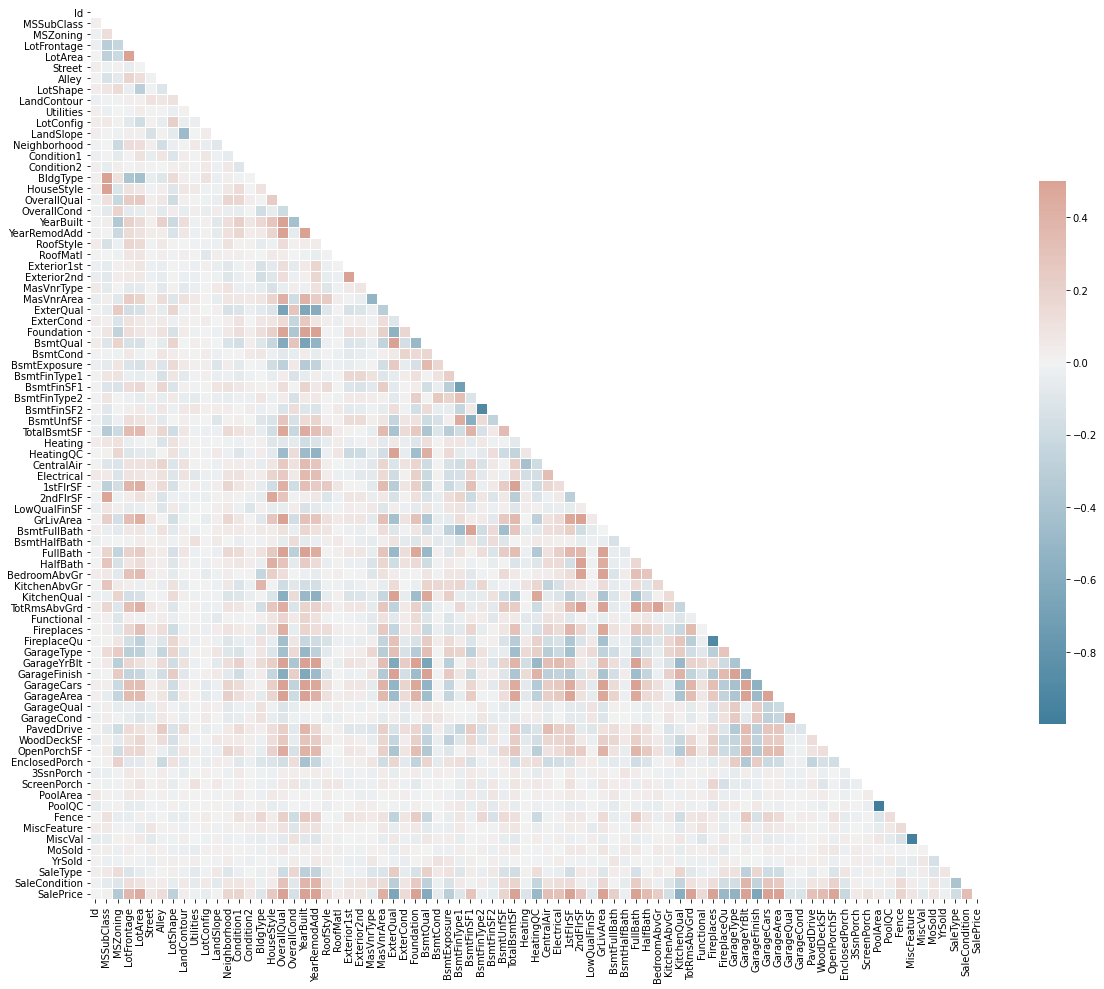

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = train_data.corr(method='spearman')
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

##### Spearman Model best features

In [12]:
indecies = np.where(correlation_matrix['SalePrice'] > 0.3)
improved_features = correlation_matrix.iloc[indecies].drop('SalePrice')
improved_features['SalePrice']
new_features_spearman = list(improved_features.index)
new_features_spearman

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'Foundation',
 'TotalBsmtSF',
 'CentralAir',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SaleCondition']

##### Selecting feature based on Statistics (Scoring Function)
* Linear model for testing the individual effect of each of many regressors. This is a scoring function to be used in a feature selection procedure.
1. The correlation between each regressor and the target is computed, that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) * std(y)).

2. It is converted to an F score then to a p-value.

In [13]:
from sklearn.feature_selection import SelectKBest, f_regression
X = train_data.drop(["Id","SalePrice"],axis=1)
y = train_data["SalePrice"]

#Select the top features in the dataset
feature_selector = SelectKBest(f_regression,k=20)
feature_selector.fit(X, y)

f_scores = pd.DataFrame(list(zip(X.columns, feature_selector.scores_, feature_selector.pvalues_)),
                           columns=['ftr', 'score', 'pval']).dropna(axis=0)
f_scores = pd.DataFrame(f_scores)
f_scores.head()

,ftr,score,pval
0,MSSubClass,10.247615,1.399598e-03
1,MSZoning,50.718016,1.705808e-12
2,LotFrontage,241.217868,2.790973e-50
3,LotArea,315.881102,7.769502e-64
4,Street,3.638880,5.665096e-02


##### Scoring Function best features

In [14]:
kbest = np.asarray(X.columns)[feature_selector.get_support()]

##### Selecting features based Random Forest Feature Importance
* The impurity-based feature importances.

* The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

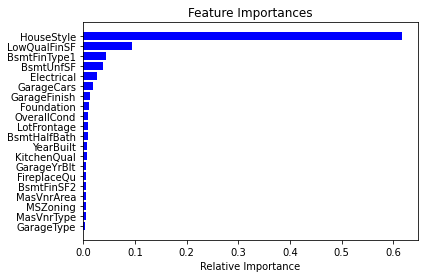

In [15]:
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import matplotlib.pyplot as plt
x = train_data.drop(["Id","SalePrice"],axis=1).values
y = train_data["SalePrice"]
model = RandomForestRegressor(n_estimators=100)
model.fit(x,y)
dict_importantance = dict(reversed(sorted(zip(model.feature_importances_, train_data.columns.values))))
features = train_data.drop(["SalePrice"],axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##### Random Forest best features

In [16]:
random_for_ftr = [features[i] for i in indices]
random_for_ftr

['GarageType',
 'MasVnrType',
 'MSZoning',
 'MasVnrArea',
 'BsmtFinSF2',
 'FireplaceQu',
 'GarageYrBlt',
 'KitchenQual',
 'YearBuilt',
 'BsmtHalfBath',
 'LotFrontage',
 'OverallCond',
 'Foundation',
 'GarageFinish',
 'GarageCars',
 'Electrical',
 'BsmtUnfSF',
 'BsmtFinType1',
 'LowQualFinSF',
 'HouseStyle']

##### The set of best features from the feature selection scoring functions that were used above

In [17]:
best = set(random_for_ftr).union(set(kbest)).union(set(new_features_spearman))

##### Take a look at the data

In [18]:
train_data[best].columns

Index(['TotRmsAbvGrd', 'Electrical', 'BsmtFinType1', '1stFlrSF', 'GarageCars',
       'LotArea', 'LotFrontage', 'BsmtQual', 'HouseStyle', 'MSZoning',
       'KitchenQual', 'GarageType', 'CentralAir', 'WoodDeckSF', 'OpenPorchSF',
       'TotalBsmtSF', 'BsmtHalfBath', 'FireplaceQu', 'YearRemodAdd',
       'LowQualFinSF', 'YearBuilt', 'OverallQual', 'Fireplaces',
       'GarageFinish', 'BsmtFinSF2', 'GarageYrBlt', 'SaleCondition',
       'MasVnrType', 'GarageArea', 'HalfBath', 'BsmtUnfSF', 'GrLivArea',
       'ExterQual', 'OverallCond', 'Foundation', 'FullBath', 'MasVnrArea'],
      dtype='object')

In [19]:
feature = set(train_data[best].columns).intersection(set(categorical_data_column_names))

In [20]:
train_data = train_data[best]

In [21]:
train_data.shape

(1391, 37)

## Feature Engineering

##### Hot Encoding the categorical columns
* Encode categorical features as a one-hot numeric array.



In [22]:
len(feature)

14

^ Technical that is more than 10 features I engineered

In [23]:
from sklearn.preprocessing import OneHotEncoder
for cat_name in feature:
    cat = pd.DataFrame(train_data_df[cat_name])
    enc = OneHotEncoder()
    enc.fit(cat)
    X_enc = enc.transform(cat).toarray()
    X_enc
    df = pd.DataFrame(X_enc,columns=enc.get_feature_names(cat.columns))
    train_data = train_data.join(df)
    train_data.drop(cat_name,axis=1,inplace=True)
train_data = train_data.join(sp)

In [24]:
train_data

,TotRmsAbvGrd,1stFlrSF,GarageCars,LotArea,LotFrontage,WoodDeckSF,OpenPorchSF,TotalBsmtSF,BsmtHalfBath,YearRemodAdd,...,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,SalePrice
0,8,856,2,8450,65.0,0,61,856,0,2003,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,208500
1,6,1262,2,9600,80.0,298,0,1262,1,1976,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181500
2,6,920,2,11250,68.0,0,42,920,0,2002,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,223500
3,7,961,3,9550,60.0,0,35,756,0,1970,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,140000
4,9,1145,3,14260,84.0,192,84,1145,0,2000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7,953,2,7917,62.0,0,40,953,0,2000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,175000
1456,7,2073,2,13175,85.0,349,0,1542,0,1988,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,210000
1457,9,1188,1,9042,66.0,0,60,1152,0,2006,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,266500
1458,5,1078,1,9717,68.0,366,0,1078,0,1996,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,142125


##### Binning
* Bin continuous data into intervals.

In [25]:
# from sklearn.preprocessing import KBinsDiscretizer
# est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
# ftr = np.array(train_data["LotArea"]).reshape(-1,1)
# est.fit(ftr)
# Xt = est.transform(ftr)
# train_data["LotArea"] = Xt

In [26]:
# from sklearn.preprocessing import KBinsDiscretizer
# est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
# ftr = np.array(train_data["GrLivArea"]).reshape(-1,1)
# est.fit(ftr)
# Xt = est.transform(ftr)
# train_data["GrLivArea"] = Xt

In [27]:
# from sklearn.preprocessing import KBinsDiscretizer
# est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
# ftr = np.array(train_data["OpenPorchSF"]).reshape(-1,1)
# est.fit(ftr)
# Xt = est.transform(ftr)
# train_data["OpenPorchSF"] = Xt

In [28]:
# from sklearn.preprocessing import KBinsDiscretizer
# est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
# ftr = np.array(train_data["TotalBsmtSF"]).reshape(-1,1)
# est.fit(ftr)
# Xt = est.transform(ftr)
# train_data["TotalBsmtSF"] = Xt

In [29]:
train_data

,TotRmsAbvGrd,1stFlrSF,GarageCars,LotArea,LotFrontage,WoodDeckSF,OpenPorchSF,TotalBsmtSF,BsmtHalfBath,YearRemodAdd,...,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,SalePrice
0,8,856,2,8450,65.0,0,61,856,0,2003,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,208500
1,6,1262,2,9600,80.0,298,0,1262,1,1976,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181500
2,6,920,2,11250,68.0,0,42,920,0,2002,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,223500
3,7,961,3,9550,60.0,0,35,756,0,1970,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,140000
4,9,1145,3,14260,84.0,192,84,1145,0,2000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7,953,2,7917,62.0,0,40,953,0,2000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,175000
1456,7,2073,2,13175,85.0,349,0,1542,0,1988,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,210000
1457,9,1188,1,9042,66.0,0,60,1152,0,2006,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,266500
1458,5,1078,1,9717,68.0,366,0,1078,0,1996,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,142125


In [30]:
train_data.describe()

,TotRmsAbvGrd,1stFlrSF,GarageCars,LotArea,LotFrontage,WoodDeckSF,OpenPorchSF,TotalBsmtSF,BsmtHalfBath,YearRemodAdd,...,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,SalePrice
count,1391.000000,1391.000000,1391.00000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,...,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000
mean,6.473760,1145.184040,1.74982,9272.537024,67.348670,90.616104,45.171819,1041.950395,0.056075,1984.989216,...,0.234364,0.292595,0.415528,0.057513,0.081237,0.025162,0.422717,0.445004,0.025881,178136.292595
std,1.578815,362.979555,0.74955,3196.732418,19.335432,119.725354,63.498462,410.119186,0.236318,20.676905,...,0.423753,0.455118,0.492990,0.232903,0.273296,0.156673,0.494169,0.497145,0.158836,75793.167741
min,2.000000,334.000000,0.00000,1491.000000,21.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,5.000000,874.500000,1.00000,7429.000000,60.000000,0.000000,0.000000,793.000000,0.000000,1967.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129000.000000
50%,6.000000,1077.000000,2.00000,9286.000000,63.000000,0.000000,24.000000,980.000000,0.000000,1994.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,160000.000000
75%,7.000000,1362.000000,2.00000,11231.500000,78.000000,168.000000,66.000000,1268.000000,0.000000,2004.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,210000.000000
max,14.000000,3228.000000,4.00000,17671.000000,182.000000,736.000000,547.000000,3206.000000,2.000000,2010.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,745000.000000


In [31]:
# from sklearn.preprocessing import FunctionTransformer
# transformer = FunctionTransformer(np.log1p)
# ftr = train_data["GarageArea"]
# transformer.fit(ftr)
# X = transformer.transform(ftr)
# train_data["GarageArea"] = X

In [32]:
# from sklearn.preprocessing import FunctionTransformer
# transformer = FunctionTransformer(np.log1p)
# ftr = train_data["1stFlrSF"]
# transformer.fit(ftr)
# X = transformer.transform(ftr)
# train_data["1stFlrSF"] = X


In [33]:
train_data

,TotRmsAbvGrd,1stFlrSF,GarageCars,LotArea,LotFrontage,WoodDeckSF,OpenPorchSF,TotalBsmtSF,BsmtHalfBath,YearRemodAdd,...,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,SalePrice
0,8,856,2,8450,65.0,0,61,856,0,2003,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,208500
1,6,1262,2,9600,80.0,298,0,1262,1,1976,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181500
2,6,920,2,11250,68.0,0,42,920,0,2002,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,223500
3,7,961,3,9550,60.0,0,35,756,0,1970,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,140000
4,9,1145,3,14260,84.0,192,84,1145,0,2000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7,953,2,7917,62.0,0,40,953,0,2000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,175000
1456,7,2073,2,13175,85.0,349,0,1542,0,1988,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,210000
1457,9,1188,1,9042,66.0,0,60,1152,0,2006,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,266500
1458,5,1078,1,9717,68.0,366,0,1078,0,1996,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,142125


In [34]:
train_data.describe()

,TotRmsAbvGrd,1stFlrSF,GarageCars,LotArea,LotFrontage,WoodDeckSF,OpenPorchSF,TotalBsmtSF,BsmtHalfBath,YearRemodAdd,...,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,SalePrice
count,1391.000000,1391.000000,1391.00000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,...,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000
mean,6.473760,1145.184040,1.74982,9272.537024,67.348670,90.616104,45.171819,1041.950395,0.056075,1984.989216,...,0.234364,0.292595,0.415528,0.057513,0.081237,0.025162,0.422717,0.445004,0.025881,178136.292595
std,1.578815,362.979555,0.74955,3196.732418,19.335432,119.725354,63.498462,410.119186,0.236318,20.676905,...,0.423753,0.455118,0.492990,0.232903,0.273296,0.156673,0.494169,0.497145,0.158836,75793.167741
min,2.000000,334.000000,0.00000,1491.000000,21.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,5.000000,874.500000,1.00000,7429.000000,60.000000,0.000000,0.000000,793.000000,0.000000,1967.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129000.000000
50%,6.000000,1077.000000,2.00000,9286.000000,63.000000,0.000000,24.000000,980.000000,0.000000,1994.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,160000.000000
75%,7.000000,1362.000000,2.00000,11231.500000,78.000000,168.000000,66.000000,1268.000000,0.000000,2004.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,210000.000000
max,14.000000,3228.000000,4.00000,17671.000000,182.000000,736.000000,547.000000,3206.000000,2.000000,2010.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,745000.000000


## Model Evaluation

#### Random Forrest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import shap
%matplotlib inline
import matplotlib.pyplot as plt
pipe = make_pipeline(StandardScaler(),RandomForestRegressor())
x = train_data.drop("SalePrice",axis=1).values
y = train_data["SalePrice"].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))
rfr = y_pred

Mean Absolute Error: 16846.59027511962
Mean Squared Error: 690694801.1442935
Root Mean Squared Error: 26281.073059224458
R-squared Error: 0.8752141110839878


##### Support Vector Regressor

In [36]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
print(x)
pipe = make_pipeline(StandardScaler(), SVR(kernel='linear', C=10000))
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))
svr = y_pred

[[8.000e+00 8.560e+02 2.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [6.000e+00 1.262e+03 2.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [6.000e+00 9.200e+02 2.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 ...
 [9.000e+00 1.188e+03 1.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [5.000e+00 1.078e+03 1.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [6.000e+00 1.256e+03 1.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]]
Mean Absolute Error: 16221.146423881713
Mean Squared Error: 590295681.4064032
Root Mean Squared Error: 24296.001346032295
R-squared Error: 0.8933529379321437


##### K Nearest Regressor

In [37]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline
# pipe = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=11))
# pipe.fit(x_train,y_train)
# y_pred = pipe.predict(x_test)
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print('R-squared Error:', metrics.r2_score(y_test, y_pred))
# knr = y_pred

In [38]:
# df = pd.DataFrame({"Random_Forrest":rfr,"SVR":svr,"KNR":knr,"y_pred":y_test})
df = pd.DataFrame({"Random_Forrest":rfr,"SVR":svr,"y_test":y_test})
# df["Average"] = (df["Random_Forrest"] + df["SVR"] + df["KNR"] )/3
df["Average"] = (df["Random_Forrest"] + df["SVR"] )/2
y_test = np.array(df["Average"])

In [39]:
df

,Random_Forrest,SVR,y_test,Average
0,252552.73,239582.188741,227000,246067.459371
1,194144.00,218696.834565,184000,206420.417283
2,142011.00,146165.908602,149300,144088.454301
3,107691.59,111085.983208,119750,109388.786604
4,193160.70,208868.591886,208900,201014.645943
...,...,...,...,...
413,150714.00,153346.733465,144152,152030.366732
414,162029.50,177723.699551,171000,169876.599776
415,170822.80,158543.460162,174000,164683.130081
416,436147.18,282316.664648,287000,359231.922324


In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 7071.88826428697
Mean Squared Error: 103170178.4760941
Root Mean Squared Error: 10157.272196613325
R-squared Error: 0.9773086325819035


Use Shapley summary plot to explain your model.